In [1]:
import numpy as np
import pandas as pd
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


import keras
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator


In [2]:

filenames = os.listdir('train')
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'one':
        categories.append(str(1))
    else:
        categories.append(str(0))

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

df.head(5)


# # save the reshaped photos
# save('dogs_vs_cats_photos.npy', photos)
# save('dogs_vs_cats_labels.npy', labels)

,filename,category
0,one.1001th.png,1
1,one.1004th.png,1
2,one.1008th.png,1
3,one.1009th.png,1
4,one.1010th.png,1


<AxesSubplot:>

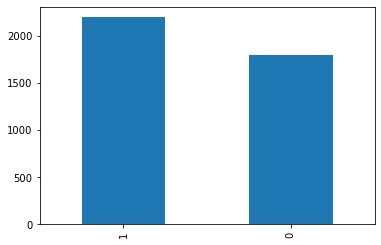

In [3]:
df['category'].value_counts().plot.bar()

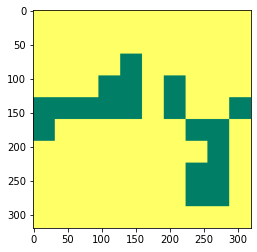

In [4]:
sample = random.choice(filenames)
image = load_img("train/"+sample)
plt.imshow(image)

In [5]:
train_data, valid_data = train_test_split(df, test_size=0.1, random_state = 42)
train_data = train_data.reset_index(drop=True)
valid_data = valid_data.reset_index(drop=True)

print(train_data.shape,valid_data.shape)

train_data_gen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_data_gen.flow_from_dataframe(
    train_data, 
    "train/", 
    x_col='filename',
    y_col='category',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=15
)

# Validation Data Generator 

valid_data_gen = ImageDataGenerator(
    rescale=1./255
)

valid_generator = valid_data_gen.flow_from_dataframe(
    valid_data, 
    "train/", 
    x_col='filename',
    y_col='category',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=15
)


(3600, 2) (400, 2)
Found 3600 validated image filenames belonging to 2 classes.
Found 400 validated image filenames belonging to 2 classes.


In [6]:
# model = keras.models.Sequential([
#                          keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=(128,128,3)),
#                          keras.layers.MaxPooling2D(pool_size=(2,2)),
#                          keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
#                          keras.layers.MaxPooling2D(pool_size=(2,2)),
#                          keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
#                          keras.layers.MaxPooling2D(pool_size=(2,2)),
#                          keras.layers.Flatten(),
#                          keras.layers.Dense(units=128, activation='relu'),
#                          keras.layers.Dropout(0.25),
#                          keras.layers.Dense(units=256, activation='relu'),
#                          keras.layers.Dropout(0.5),
#                          keras.layers.Dense(units=256, activation='relu'),
#                          keras.layers.Dropout(0.25),                        
#                          keras.layers.Dense(units=128, activation='relu'),
#                          keras.layers.Dropout(0.10),                         
#                          keras.layers.Dense(units=2, activation='softmax')
# ])

from keras.models import model_from_yaml	
# load YAML and create model
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
model=loaded_model
type(loaded_model)



Loaded model from disk


tensorflow.python.keras.engine.sequential.Sequential

In [7]:
# model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
# model.fit(train_generator, epochs=15, verbose=1, validation_data=valid_generator)

In [8]:
# # Saving Model 
# # serialize model to YAML
# model_yaml = model.to_yaml()
# with open("model.yaml", "w") as yaml_file:
#     yaml_file.write(model_yaml)
# # serialize weights to HDF5
# model.save_weights("model.h5")
# print("Saved model to disk")

In [9]:
test_filenames = os.listdir("test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
idlist=[]
for file in test_df["filename"]:
    idlist.append(file.split(".")[0])

#test_df['ids'] = alist
nb_samples = test_df.shape[0]
print(test_df.shape)

(100, 1)


<h3> Generating Test Data </h3>


In [10]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "test", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(128,128),
    batch_size=15,
    shuffle=False
)


Found 100 validated image filenames.


In [11]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples/15))
print(predict.shape)
print(predict)

(100, 2)
[[3.4698637e-04 9.9965298e-01]
 [9.0104915e-02 9.0989500e-01]
 [9.9932027e-01 6.7976804e-04]
 [8.9673442e-05 9.9991035e-01]
 [4.0532429e-02 9.5946759e-01]
 [9.9999225e-01 7.6902543e-06]
 [2.1811177e-01 7.8188819e-01]
 [5.5890836e-02 9.4410914e-01]
 [6.0589945e-01 3.9410058e-01]
 [1.6260250e-03 9.9837399e-01]
 [9.9919564e-01 8.0440479e-04]
 [9.9999225e-01 7.6902543e-06]
 [1.5183372e-02 9.8481661e-01]
 [4.5645762e-02 9.5435429e-01]
 [4.6462833e-04 9.9953544e-01]
 [1.6544165e-01 8.3455831e-01]
 [6.4783124e-04 9.9935216e-01]
 [9.9355525e-01 6.4446940e-03]
 [6.2018429e-04 9.9937975e-01]
 [4.2813444e-03 9.9571866e-01]
 [1.1135731e-02 9.8886430e-01]
 [1.5442341e-02 9.8455763e-01]
 [1.5746231e-01 8.4253770e-01]
 [9.9999225e-01 7.6902543e-06]
 [9.9999225e-01 7.6902543e-06]
 [8.2790023e-03 9.9172103e-01]
 [2.9214864e-04 9.9970788e-01]
 [1.8419886e-03 9.9815804e-01]
 [9.9191523e-01 8.0847694e-03]
 [9.9999225e-01 7.6902688e-06]
 [1.8597186e-04 9.9981409e-01]
 [9.9999225e-01 7.6902543e-06]

In [12]:
test_df['category'] = np.argmax(predict, axis=-1)

label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

test_df['category'] = test_df['category'].replace({ 'one': 1, 'zero': 0 })



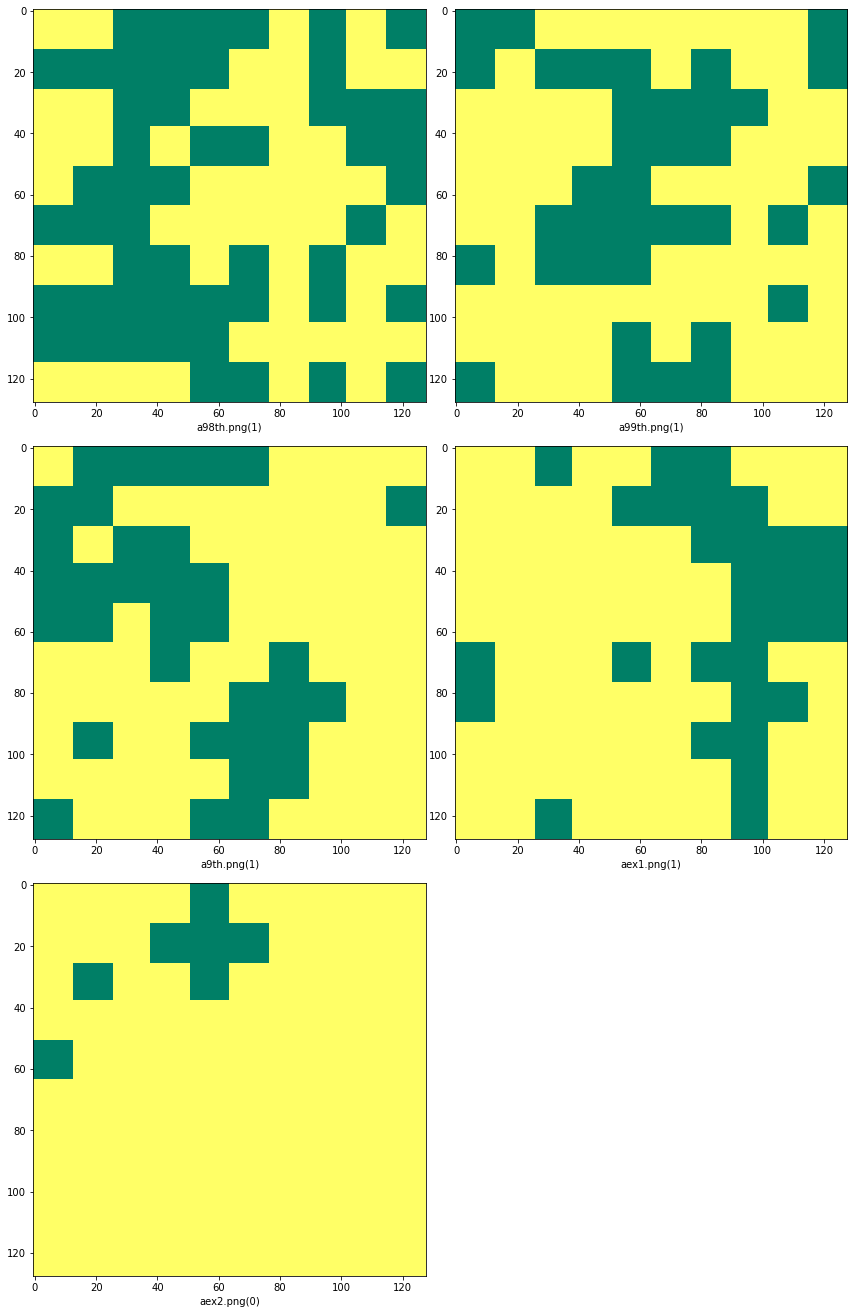

In [13]:
sample_test = test_df.tail(5)
sample_test.head()

plt.figure(figsize=(12, 24))
i=0
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("test/"+filename, target_size=(128,128))
    plt.subplot(4, 2,i+1)
    plt.imshow(img)
    plt.xlabel('a'+filename + '(' + "{}".format(category) + ')' )
    i+=1
plt.tight_layout()
plt.show()


In [14]:
print(test_df.tail())

    filename category
95  98th.png        1
96  99th.png        1
97   9th.png        1
98   ex1.png        1
99   ex2.png        0


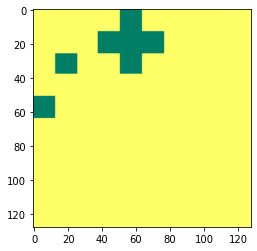

The image belongs to Class : 
Dis-ordered ie 1


In [15]:
from keras.preprocessing import image
test_image = image.load_img('test/ex2.png', target_size = (128,128))

plt.imshow(test_image)
plt.show()

test_image = image.img_to_array(test_image)


test_image = np.expand_dims(test_image, axis = 0)

result= np.argmax(model.predict(test_image))

print('The image belongs to Class : ')
if result==1:
    print('Dis-ordered ie 1')
else:
    print('Ordered ie 0')

<h3> Applying LIME </h3>


In [16]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import random

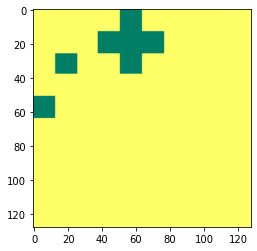

100%|██████████| 1000/1000 [00:06<00:00, 147.21it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


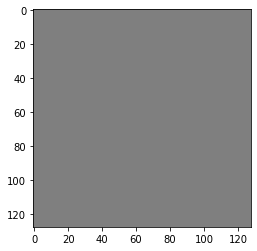

In [17]:

from keras.preprocessing import image

explainer = lime_image.LimeImageExplainer(random_state=42)

test_image = image.load_img('test/ex2.png', target_size = (128,128))
plt.imshow(test_image)
plt.show()
test_image = image.img_to_array(test_image).astype('double')

explainer = lime_image.LimeImageExplainer(random_state=42)

explanation = explainer.explain_instance(
         test_image, 
         model.predict
)
plt.imshow(test_image)
image, mask = explanation.get_image_and_mask(
         model.predict(
              test_image.reshape((1,128,128,3))
         ).argmax(axis=1)[0],
         positive_only=True, 
         hide_rest=True,
         num_features=2)
plt.imshow(mark_boundaries(image / 2 + 0.5, mask))

In [60]:
import math
from typing import Dict, Optional

import matplotlib.pyplot as plt
import numpy as np

from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm
from skimage.segmentation import mark_boundaries
from keras.engine.training import Model


def plot_lime_top_explanations(
    numz ,
    model: Model, 
    image: np.array, 
    class_names: Dict[int, str],
    top_preds_count: int = 3,
    fig_title: Optional[str] = None,
    fig_name: Optional[str] = None
) -> None:
    """
    A method that provides explanations for N top classes.
    :param model: Keras based Image Classification model
    :param image: Single image in the form of numpy array. Shape: [224, 224, 3]
    :param class_names_mapping: Dictionary that provides mapping between class inedex and name
    :param top_preds_count: Number of top predictions that we want to explain
    :param fig_title: Figure title
    :param fig_name: Output figure path
    :return:
    """
    
    image_columns = 3
    image_rows = math.ceil(top_preds_count / image_columns)
    
    explanation = explainer.explain_instance(
        image, 
        classifier_fn = model.predict, 
        top_labels=100, 
        hide_color=0, 
        num_samples=1000
    )
    
    preds = model.predict(np.expand_dims(image, axis=0))
    top_preds_indexes = np.flip(np.argsort(preds))[0,:top_preds_count]
    top_preds_values = preds.take(top_preds_indexes)
    top_preds_names = np.vectorize(lambda x: class_names[x])(top_preds_indexes)
    
    plt.style.use('seaborn-whitegrid')
    fig, axes = plt.subplots(image_rows, image_columns, figsize=(image_columns * 5, image_rows * 5))
    [ax.set_axis_off() for ax in axes.flat]
    
    for i, (index, value, name, ax) in \
        enumerate(zip(top_preds_indexes, top_preds_values, top_preds_names, axes.flat)):
        
        temp, mask = explanation.get_image_and_mask(
            explanation.top_labels[i], 
            positive_only=False, 
            num_features=numz, 
            hide_rest=True
        )
        
        subplot_title = "{}. class: {} pred: {:.3f}".format(i + 1, name, value)
        ax.imshow(mark_boundaries(temp / 255, mask))
        ax.set_title(subplot_title, pad=20)
    
    if fig_title:
        fig.suptitle(fig_title, fontsize=30)
    if fig_name:
        plt.savefig(fig_name)
    plt.show()



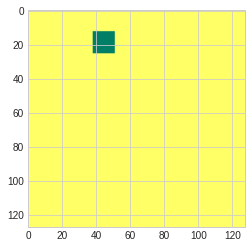

(128, 128, 3)


In [61]:
from keras.preprocessing import image
test_im = image.load_img('test/0th.png', target_size = (128,128))
plt.imshow(test_im)
plt.show()
test_im = image.img_to_array(test_im).astype('double')
type(test_im) 
print(test_im.shape)

100%|██████████| 1000/1000 [00:07<00:00, 141.51it/s]


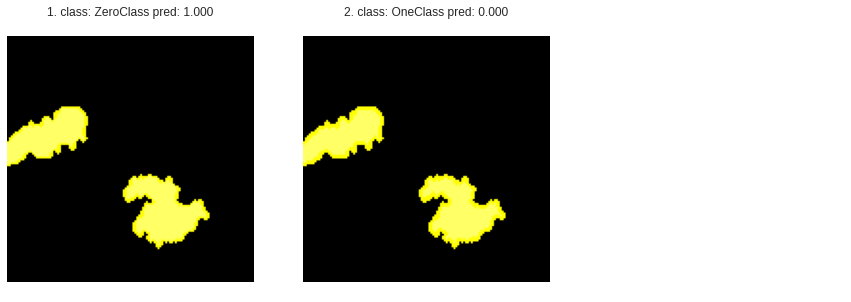

100%|██████████| 1000/1000 [00:06<00:00, 147.84it/s]


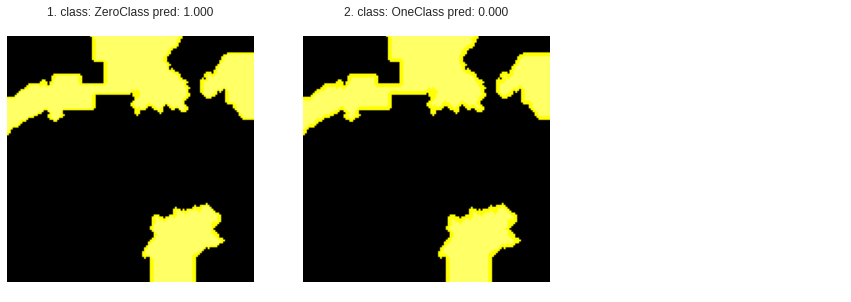

100%|██████████| 1000/1000 [00:07<00:00, 140.77it/s]


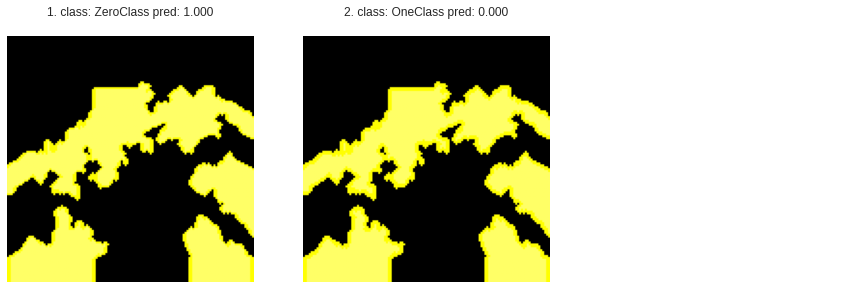

100%|██████████| 1000/1000 [00:06<00:00, 143.78it/s]


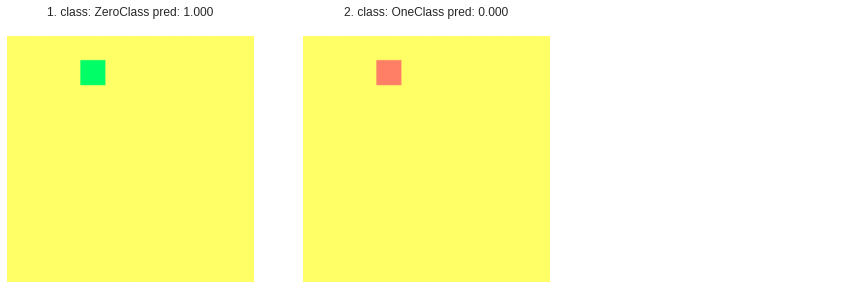

In [62]:
plot_lime_top_explanations(2,model,test_im,{1:'OneClass',0:'ZeroClass'},2)
plot_lime_top_explanations(4,model,test_im,{1:'OneClass',0:'ZeroClass'},2)
plot_lime_top_explanations(8,model,test_im,{1:'OneClass',0:'ZeroClass'},2)
plot_lime_top_explanations(100,model,test_im,{1:'OneClass',0:'ZeroClass'},2)

<h3>Explanation with SHAP  </h3>